# IBM Data Analyst Capstone Project


This project, based on the **IBM Data Analyst Professional Certification** from Coursera, simulates the role of a Data Analyst at a global IT consulting firm. The goal is to analyze data and identify emerging skills necessary to remain competitive in the IT industry. Using the **2019 Stack Overflow Developer Survey** dataset, approximately 10% of the 90,000 respondents were analyzed to extract insights and guide strategic decisions.


For more information about the survey, [click here](https://survey.stackoverflow.co/2019). 

#### Objective:
* Exploring Data
* Data Wrangling
* Exploritory Data Analysis
* Data Visualization


In [5]:
pip install --upgrade bottleneck

In [6]:
# import required libraries
import pandas as pd
import numpy as np

In [7]:
#import data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(url)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


### Exploring Data:

In [8]:
# check data dimensions
df.shape

(11552, 85)

In [9]:
# indentify  data types of each column
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [10]:
# Show how many countries participated in the survey
df['Country'].nunique()

135

### Data Wrangling:

In [11]:
# Find  duplicate rows 
df.duplicated().sum()

154

In [12]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Find  missing values for all columns
print(df.isnull().sum())

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


In [15]:
# Find the number of missing values in the 'WorkLoc' column
df['WorkLoc'].isnull().sum()

32

In [16]:
# Find the value counts of  'WorkLoc' column
df['WorkLoc'].value_counts().to_frame()

,count
WorkLoc,
Office,6806
Home,3589
"Other place, such as a coworking space or cafe",971


In [17]:
# Impute missing values in 'WorkLoc' with the most frequent value  
mode = df['WorkLoc'].mode()[0]
df['WorkLoc'] = df['WorkLoc'].replace(np.nan, mode)

In [18]:
df['WorkLoc'].isnull().sum()

0

In [19]:
df['WorkLoc'].value_counts().to_frame()

,count
WorkLoc,
Office,6838
Home,3589
"Other place, such as a coworking space or cafe",971


#### Compensation Data Normalization:
The dataset contains two columns related to compensation: **'CompFreq'** (frequency of payment) and **'CompTotal'** (total compensation). To compare developer compensation across different payment frequencies (yearly, monthly, weekly), a new column, **'NormalizedAnnualCompensation'**, is created.
We use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

* If the CompFreq is Yearly then use the exising value in CompTotal
* If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
* If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)


In [20]:
# List out the various categories in the column 'CompFreq'
df['CompFreq'].value_counts().to_frame()

,count
CompFreq,
Yearly,6073
Monthly,4788
Weekly,331


In [21]:
# Create 'NormalizedAnnualCompensation' column
nac=[]
for i in range(len(df)):
    if df['CompFreq'].iloc[i]=='Weekly':
        nac.append(df['CompTotal'].iloc[i]*52)
    elif df['CompFreq'].iloc[i]=='Monthly':
        nac.append(df['CompTotal'].iloc[i]*12)
    else:
        nac.append(df['CompTotal'].iloc[i]*1)
        
df['NormalizedAnnualCompensation']=nac
df[['CompTotal', 'CompFreq', 'NormalizedAnnualCompensation']].head()
        

,CompTotal,CompFreq,NormalizedAnnualCompensation
0,61000.0,Yearly,61000.0
1,138000.0,Yearly,138000.0
2,90000.0,Yearly,90000.0
3,29000.0,Monthly,348000.0
4,90000.0,Yearly,90000.0


### Exploratory Data Analysis:

In this section,we find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.

Objectives:
* Identify the distribution of data in the dataset.
* Identify outliers in the dataset.
* Remove outliers from the dataset.
* Identify correlation between features in the dataset.
    

The column **'ConvertedComp'** contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01. This assumes 12 working months and 50 working weeks.

In [22]:
pip install --upgrade seaborn pandas


Note: you may need to restart the kernel to use updated packages.


<Figure size 500x300 with 0 Axes>

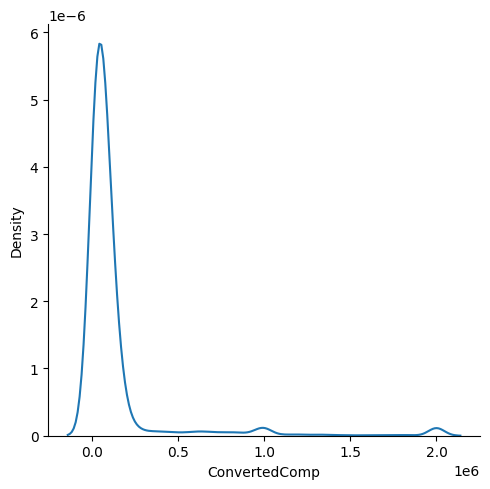

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot distribution curve of 'ConvertedComp'
plt.figure(figsize=(5,3))
sns.displot(data=df,x='ConvertedComp',kind='kde')
plt.show()

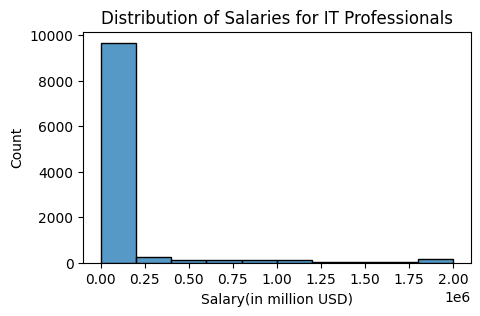

In [24]:
# Plot the histogram of 'ConvertedComp'
plt.figure(figsize=(5, 3))
sns.histplot(data=df,x='ConvertedComp',bins=10,kde=False)
plt.xlabel('Salary(in million USD)')
plt.ylabel('Count')
plt.title('Distribution of Salaries for IT Professionals')
plt.show()

In [25]:
# Find the median of  'ConvertedComp'
df['ConvertedComp'].median()

57745.0

In [26]:
# Find how many responders identified themselves only as a Man
df['Gender'].value_counts().to_frame()

,count
Gender,
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


In [27]:
# Find  median 'ConvertedComp' of responders identified  as a Women
df['ConvertedComp'][(df.Gender=='Woman')].median()

57708.0

In [28]:
# Summary of column 'Age'
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<Figure size 500x300 with 0 Axes>

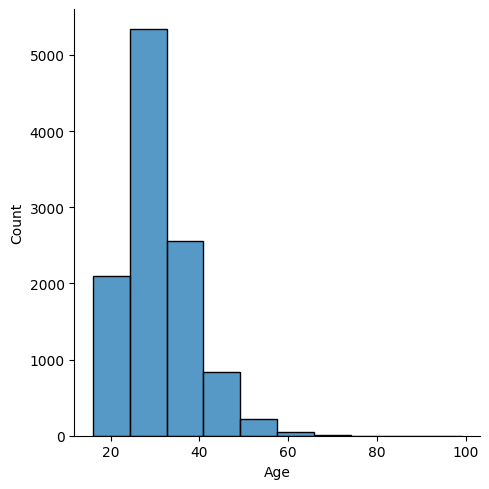

In [29]:
# Plot a histogram of the column 'Age'
plt.figure(figsize=(5,3))
sns.displot(data=df,x='Age',bins=10,kind='hist')
plt.show()

#### Indentifying Outliers:
To identify outliers in the **'ConvertedComp'** column, a box plot is used.

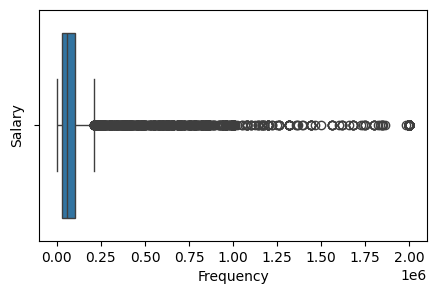

In [31]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='ConvertedComp')
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.show()

In [32]:
# Calculate Interquartile Range (IQR)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")   

Q1 (25th percentile): 26868.0
Q3 (75th percentile): 100000.0
Interquartile Range (IQR): 73132.0


In [33]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Number of outliers
num_outliers = len(outliers)

print(f"Number of outliers: {num_outliers}")
print("Outliers:\n", outliers)

Number of outliers: 879
Outliers:
        Respondent                                         MainBranch Hobbyist  \
3              16                     I am a developer by profession      Yes   
13             32                     I am a developer by profession       No   
45            100                     I am a developer by profession      Yes   
46            102                     I am a developer by profession       No   
60            128  I am not primarily a developer, but I write co...      Yes   
...           ...                                                ...      ...   
11450       24915                     I am a developer by profession      Yes   
11457       24931                     I am a developer by profession       No   
11504       25036                     I am a developer by profession      Yes   
11507       25047                     I am a developer by profession      Yes   
11523       25086                     I am a developer by profession      

In [34]:
# Create a new dataframe by removing the outliers from 'convertedComp'
new_df = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]
new_df.shape

(10519, 86)

#### Correlation:


In [35]:
# Find the correlation between 'Age' and all other numerical columns in the new dataframe
new_df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950,0.001307
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371,0.703632
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821,-0.086286
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452,0.009935
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961,0.038952
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000,-0.016317
NormalizedAnnualCompensation,0.001307,0.703632,-0.086286,0.009935,0.038952,-0.016317,1.000000


### Data Visualization

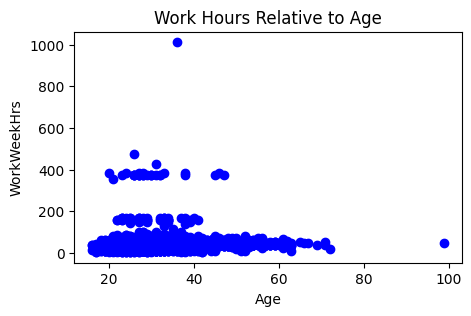

In [36]:
# Create a scatter plot of 'Age' and 'WorkWeekHrs'
plt.figure(figsize=(5,3))
plt.scatter(new_df['Age'], new_df['WorkWeekHrs'], color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Work Hours Relative to Age')

# Show the plot
plt.show()


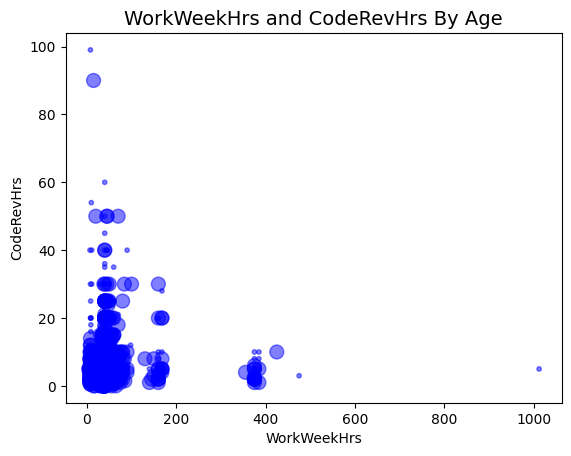

In [37]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size.
new_df.plot( kind='scatter',x='WorkWeekHrs', y='CodeRevHrs',s='Age',alpha=0.5,sizes=(10, 100),color='blue')
plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

Text(0.5, 1.0, 'Median Hours by Age')

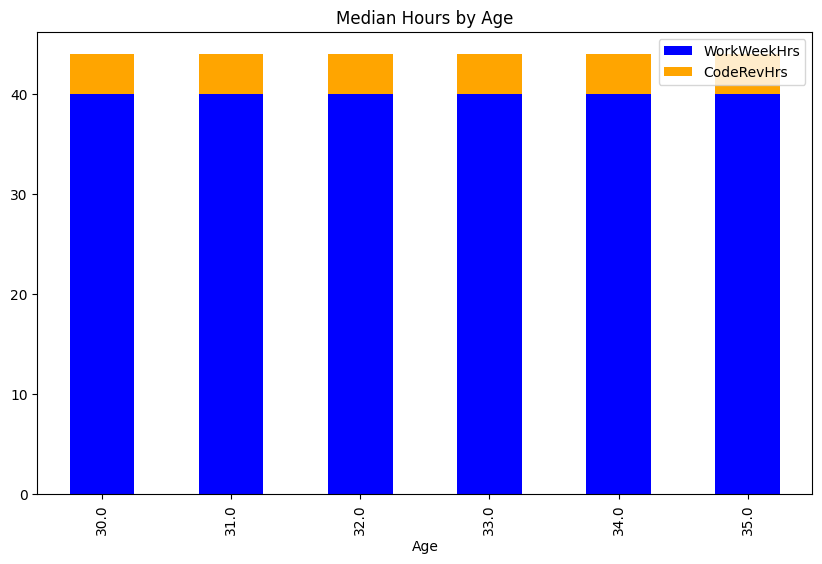

In [54]:
#Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
df1=new_df[(new_df['Age']>=30) & (new_df['Age']<=35)][['WorkWeekHrs','CodeRevHrs','Age']]
df1=df1.groupby('Age').median()
df1.plot(kind='bar',stacked=True,color=['blue','orange'],figsize=(10,6))
plt.title('Median Hours by Age')

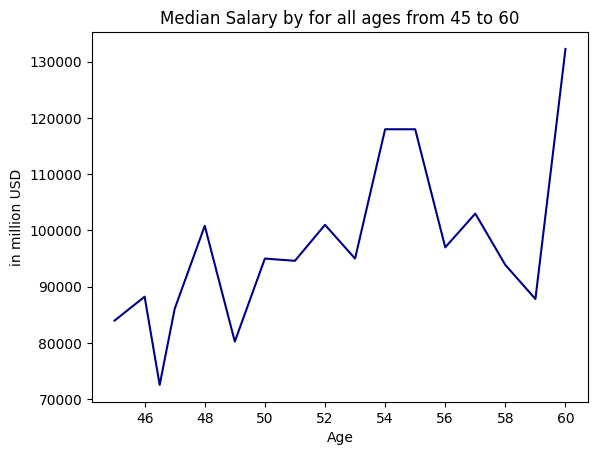

In [59]:
# Plot the median ConvertedComp for all ages from 45 to 60.
df2=new_df[(new_df['Age']>=45) & (new_df['Age']<=60)][['Age', 'ConvertedComp']]
df2=df2.groupby('Age')['ConvertedComp'].median()
df2.plot(kind='line',color='darkblue')
plt.title('Median Salary by for all ages from 45 to 60')
plt.xlabel('Age')
plt.ylabel('in million USD')
plt.show()

MainBranch
I am a developer by profession                                                   9808
I am not primarily a developer, but I write code sometimes as part of my work     711
dtype: int64


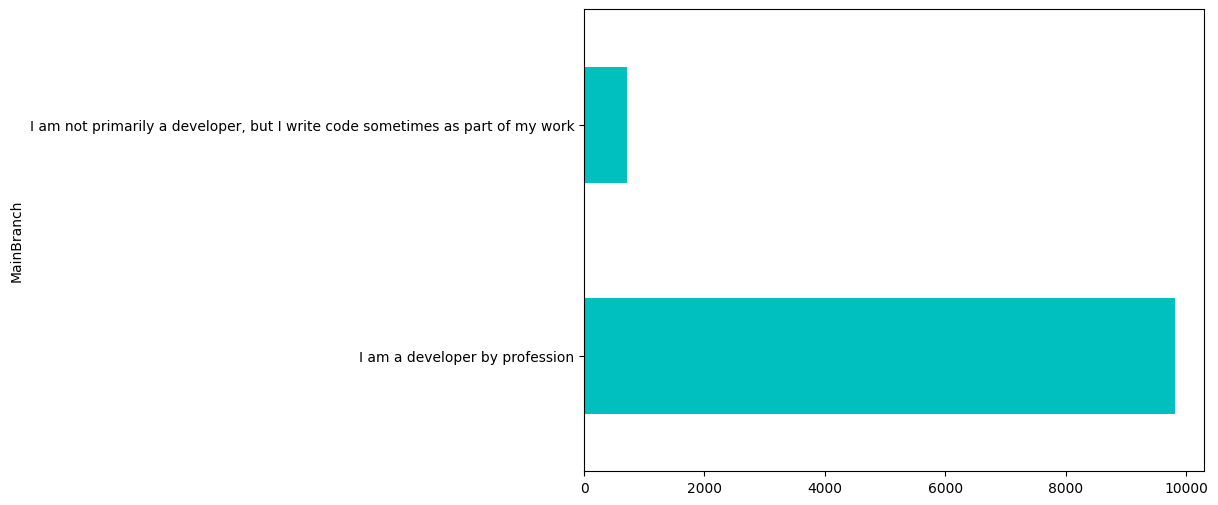

In [62]:
#Create a horizontal bar chart using column MainBranch.
df3=new_df.groupby('MainBranch').size()
df3.plot(kind='barh',color='c',figsize=(8, 6))
print(df3)

plt.show()

In [71]:
#Create a pie chart of the top 5 databases that respondents wish to learn next year
new_df['DatabaseDesireNextYear'].to_frame()

,DatabaseDesireNextYear
0,MySQL;SQLite
1,PostgreSQL;Redis;SQLite
2,Firebase;MySQL;Redis
4,Elasticsearch;Firebase;MongoDB;PostgreSQL
5,DynamoDB
...,...
11547,Microsoft SQL Server
11548,MariaDB;MongoDB;MySQL
11549,NaN
11550,Elasticsearch;MongoDB;Microsoft SQL Server;Redis


Several respondents have provided multiple entries separated by semicolons. To include all entries in the tally, each data point with multiple entries needs to be split. A function was created to separate the semicolon-delimited data and add them to new rows.

In [63]:
# data splitter function
def split_and_create_row(data_frame, column):
    values = data_frame[column].split(';')
    return pd.Series(values)

In [64]:
df_1 = new_df['DatabaseDesireNextYear'].astype(str).to_frame()
df_1.head()

,DatabaseDesireNextYear
0,MySQL;SQLite
1,PostgreSQL;Redis;SQLite
2,Firebase;MySQL;Redis
4,Elasticsearch;Firebase;MongoDB;PostgreSQL
5,DynamoDB


In [69]:
# Apply the function to each row in df['DatabaseDesireNextYear']
df_2 = df_1.apply(split_and_create_row, axis=1, args=('DatabaseDesireNextYear',)).stack().reset_index(level=1, drop=True).to_frame('DatabaseDesireNextYear')

# Reset index
df_2.reset_index(drop=True, inplace=True)
df_2

,DatabaseDesireNextYear
0,MySQL
1,SQLite
2,PostgreSQL
3,Redis
4,SQLite
...,...
28498,Elasticsearch
28499,MongoDB
28500,Microsoft SQL Server
28501,Redis


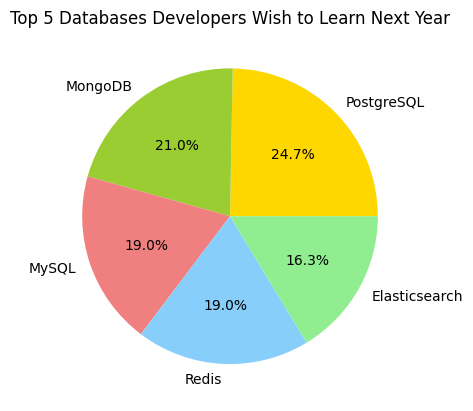

In [72]:
# Count each entry
df_3 = df_2.value_counts().to_frame()
df_3.reset_index(inplace=True)
top5_df = df_3.head(5)

# Create pie chart
fig, ax = plt.subplots()

ax.pie(top5_df['count'], labels=top5_df['DatabaseDesireNextYear'],
      colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen'],
      autopct = '%1.1f%%') #set decimal point to 1
plt.title('Top 5 Databases Developers Wish to Learn Next Year')
ax.set_aspect('equal') #ensure pie is drawn as a circleMultiple plots and sub-plotting

Thank you.